#### Вычислительная математика, 2023
## Расчет дебита горизонтальной скважины с контролем постоянного забойного давления в бесконечном пласте в пространстве Лапласа

Одной из актуальных задач нефтяного промысла является оценка оптимального расположения скважин на территории разработки, а так же их параметров. Для решения этой задачи необходимо уметь рассчитать распределение давлений в пласте, а так же дебит скважины при заданных свойствах пласта и скважины. Традиционными инструментами для таких расчетов являются методы, использующие эмпирические корреляции, и методы, основанные на построении полномасштабной трехмерной модели пласта. Однако эти методы имеют недостатки: корреляции не учитывают особенностей конкретного пласта, и основанные на них расчеты хоть и быстрые, но имеют большую погрешность; а гидродинамическое моделирование требует большого числа вычислительных, временных и кадровых ресурсов для обеспечения необходимой точности.

Компромиссным инструментом, позволяющим выполнить необходимые расчеты с достаточной скоростью и точностью, являются полуаналитические модели. Наиболее перспективными представляются модели, использующие при расчетах переход в пространство Лапласа. В этом пространстве уравнение пьезопроводности, описывающее перепад давления в пласте, принимает довольно простой вид и имеет аналитическое решение, а процедура возвращения из пространтсва Лапласа в исходное является вычислительно простой. Данный подход широко используется в программных обеспечениях для определения падения давления в скважин с постоянным дебитом ввиду простоты аналитических расчетов.

Однако в случае скважины с постоянным забойным давлением расчеты становятся сложнее, и возникает необходимость использования численных методов для получения решения: зависимости дебита от времени в скважине сложной формы. Рассмотрим частный случай: модель горизонтальной скважины в бесконечном пласте с непроницаемыми верхней и нижней границей, насыщенным несжимаемым жидким флюидом с постоянными свойствами.

Не вдаваясь в подробности вывода, приведем формулу безразмерного падения давления в пространстве Лапласа (1):
$$
\overline{p_D} = \frac{2 r_{wD} \exp{(r_{wD}\sqrt{u}})}{uh_D} \left[\int\limits_{-1}^{+1}K_0\left(\sqrt{u}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)d\alpha +
\\
+ 2\sum\limits_{n=1}^{+\infty}\cos(\pi n z_D/h_D)\cos(\pi n z_{0D}/h_D) \int\limits_{-1}^{+1}K_0\left(\sqrt{u + \frac{n^2\pi^2}{h^2_D}}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)d\alpha\right]
$$
В пространстве Лапласа безразмерный дебит зависит от давления следующим образом (2):
$$
\overline{q_D} = -\oint\limits_{S} \frac{\partial \overline{p_D}(\overrightarrow{r_D}, u)}{\partial \overrightarrow{l}}dS
$$
где $S$ - замкнутая поверхность.

**Целью данного проекта является реализация алгоритма расчета безразмерного дебита (2) при заданном поле давлений (1).**

В рамках проекта будет реализовано:
1. Вычисление интеграла от функции Бесселя
2. Вычисление бесконечной суммы
3. Интегрирование по замкнутой поверхности

Вычисление интеграла функции Бесселя будет выполнено с помощью квадратур Гаусса. Этот метод выбран потому, что он дает хороший и быстрый результат. Интегрирование некоторой функции $f(x)$ с помощью квадратур Гаусса на n точках выглядит следующим образом: 
$$
\int\limits^{+1}_{-1}f(x)dx \approx \sum\limits^{n}_{i = 1} w_i f(x_i)
$$
где $x_i$ -- корни полинома Лежандра n-й степени, $w_i$ -- их веса. Для интегрирования на другом отрезке:
$$
\int\limits^{b}_{a}f(x)dx \approx \frac{b-a}{2} \sum\limits^{n}_{i = 1} w_i f\left(\frac{b-a}{2}x_i + \frac{a+b}{2} \right)
$$
Чтобы улучшить точность вычислений при $b-a >> 2$, можно разбить область интегрирования на отрезки и на каждом из них проинтегрировать функцию в квадратурах, и полученные интегралы сложить:
$$
\int\limits^{b}_{a}f(x)dx \approx \sum\limits^{N}_{j = 1} \frac{b_j-a_j}{2} \sum\limits^{n}_{i = 1}  w_i f\left(\frac{b_j-a_j}{2} x_i + \frac{a_j+b_j}{2} \right)
$$
На равномерной сетке:
$$
\int\limits^{b}_{a}f(x)dx \approx \frac{b-a}{2N} \sum\limits^{N}_{j = 1} \sum\limits^{n}_{i = 1}  w_i f\left(\frac{b-a}{2N} x_i + \frac{a_j+b_j}{2} \right)
$$

Вычисление бесконечной суммы будет приближенным, поскольку учесть все члены ряда невозможно. Поэтому необходимо как-то определить критерий останова. В данном случае выбран самый простой критерий: $|dI| < \varepsilon |I|$, где $\varepsilon << 1$ выбирается эмпирически.

Интегрирование по замкнутой поверхности будет выполнено с учетом физических особенностей задачи. Поскольку речь идет о потоке несжимаемой жидкости, то по закону сохранения массы, поток жидкости к скважине не будет зависеть от формы выбранной вокруг нее поверхности $S$. Поэтому в качестве такой поверхности будет целесообразно выбрать паралеллепипед, заключающий в себе скважину и паралельный ей. Тогда интеграл можно представить как сумму интегралов по сторонам параллелепипеда, а вычисление производной по направлению внутри каждого интеграла сведется к производной по одной из координат. Эти частные производные вычисляются аналитически:

$$
\frac{\partial \overline{p_D}}{\partial x_D} = -\frac{2 r_{wD} e^{r_{wD}\sqrt{u}}}{u h_D} \left[ \int\limits_{-1}^{+1} K_1 \left(\sqrt{u}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)\frac{\sqrt{u}(x_D-x_{0D}-\alpha)}{\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}} d\alpha +
\\
+ 2\sum\limits_{n=1}^{+\infty}\cos(\pi n z_D/h_D)\cos(\pi n z_{0D}/h_D) \int\limits_{-1}^{+1} K_1 \left(\sqrt{u + \frac{n^2\pi^2}{h^2_D}}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)\frac{\sqrt{u + \frac{n^2\pi^2}{h^2_D}}(x_D-x_{0D}-\alpha)}{\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}} d\alpha \right]
$$

$$
\frac{\partial \overline{p_D}}{\partial y_D} = -\frac{2 r_{wD} e^{r_{wD}\sqrt{u}}}{u h_D} \left[ \int\limits_{-1}^{+1} K_1 \left(\sqrt{u}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)\frac{\sqrt{u}(y_D-y_{0D})}{\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}} d\alpha +
\\
+ 2\sum\limits_{n=1}^{+\infty}\cos(\pi n z_D/h_D)\cos(\pi n z_{0D}/h_D) \int\limits_{-1}^{+1} K_1 \left(\sqrt{u + \frac{n^2\pi^2}{h^2_D}}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right)\frac{\sqrt{u + \frac{n^2\pi^2}{h^2_D}}(y_D-y_{0D})}{\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}} d\alpha \right]
$$

$$
\frac{\partial \overline{p_D}}{\partial z_D} = -\frac{4\pi r_{wD} e^{r_{wD}\sqrt{u}} }{u h_D^2} \sum\limits_{n=1}^{+\infty} n \sin(\pi n z_D/h_D)\cos(\pi n z_{0D}/h_D) \int\limits_{-1}^{+1} K_0 \left(\sqrt{u + \frac{n^2\pi^2}{h^2_D}}\sqrt{(x_D-x_{0D}-\alpha)^2 + (y_D-y_{0D})^2}\right) d\alpha
$$

In [31]:
import numpy as np
import scipy as sp
import scipy.special as ss
import matplotlib.pyplot as plt

In [32]:
lh = 200.        # длина горизонтальной скважины (м)
norm = lh / 2
rwd = 0.1 / norm # радиус скважины (безразм.)
hd = 10. / norm  # мощность пласта (безразм.)
x0d = 0. / norm  # координата середины горизонтальной скважины (безразм.)
y0d = 0. / norm  # координата середины горизонтальной скважины (безразм.)
z0d = hd / 2     # координата середины горизонтальной скважины (безразм.)

# размеры поверхности-прямоугольника, скважина параллельна оси OX
lxd = 1.1 * lh / norm
lyd = 2 * 2 * rwd / norm
lzd = 2 * 2 * rwd / norm
print(lxd, lyd, lzd)

2.2 4e-05 4e-05


In [38]:
gauss_quadr_coef = [0.2955242247, 0.2692667193, 0.2190863625, 0.1494513492, 0.0666713443, 0.2955242247, 0.2692667193, 0.2190863625, 0.1494513492, 0.0666713443 ]
gauss_quadr_argu = [0.1488743390, 0.4333953941, 0.6794095683, 0.8650633667, 0.9739065285, -0.1488743390, -0.4333953941, -0.6794095683, -0.8650633667, -0.9739065285 ]
n_point = len(gauss_quadr_coef)
n_point

In [46]:
gauss_quadr_argu = [-0.9324700, -0.6612094, -0.2386142, 0.2386142, 0.6612094, 0.9324700]
gauss_quadr_coef = [0.1713245, 0.3607616, 0.4679140, 0.4679140, 0.3607616, 0.1713245]
n_point = len(gauss_quadr_coef)
n_point

6

In [47]:
# интеграл от К_1 + sum(cos * cos * K_1 * x)
def int_k1_x(u, dx, dy, z, z0, h):
    N = 10
    ba_2 = 1./N
    I = 0.
    arg_cos1 = np.pi * z / h
    arg_cos2 = np.pi * z0 / h
    for j in range(N):
        a = -1. + j * (2. / N)
        b = -1. + (j + 1) * (2. / N)
        
        for i in range(n_point):
            alpha = 0.5 * (a + b) + ba_2 * gauss_quadr_argu[i]
            arg = (dy**2 + (dx - alpha)**2)**(0.5)
            I1 = 0.
            
            n = 0
            eps_n = (u +  (np.pi * n / h)**2)**(0.5)
            dI = ss.kn(1, eps_n * arg) * eps_n * (dx - alpha) / arg
            
            while (abs(dI) > 0.1 * abs (I1)):
                I1 += 2 * dI * np.cos(n * arg_cos1) * np.cos(n * arg_cos2)
                n += 1
                eps_n = (u +  (np.pi * n / h)**2)**(0.5)
                dI = ss.kn(1, eps_n * arg) * eps_n * (dx - alpha) / arg
                
            I += I1 * gauss_quadr_coef[i] * ba_2
    
    return I

int_k1_x(29, lxd/2, 0, z0d, z0d, hd)

1.7272116046140307

In [49]:
# интеграл от К_1 + sum(cos * cos * K_1 * y)
def int_k1_y(u, dx, dy, z, z0, h):
    N = 10
    ba_2 = 1./N
    I = 0.
    arg_cos1 = np.pi * z / h
    arg_cos2 = np.pi * z0 / h
    for j in range(N):
        a = -1. + j * (2. / N)
        b = -1. + (j + 1) * (2. / N)
        
        for i in range(n_point):
            alpha = 0.5 * (a + b) + ba_2 * gauss_quadr_argu[i]
            arg = (dy**2 + (dx - alpha)**2)**(0.5)
            I1 = 0.
            
            n = 0
            eps_n = (u +  (np.pi * n / h)**2)**(0.5)
            dI = ss.kn(1, eps_n * arg) * eps_n * dy / arg
            
            while (abs(dI) > 0.1 * abs (I1)):
                I1 += 2 * dI * np.cos(n * arg_cos1) * np.cos(n * arg_cos2)
                n += 1
                eps_n = (u +  (np.pi * n / h)**2)**(0.5)
                dI = ss.kn(1, eps_n * arg) * eps_n * dy / arg
                
            I += I1 * gauss_quadr_coef[i] * ba_2
    
    return I

int_k1_y(29, 0, lxd/2, z0d, z0d, hd)

0.016278396854797463

In [76]:
# интеграл от К_0 + sum(sin * cos * K_0)
def int_k0(u, dx, dy, z, z0, h):
    N = 100
    ba_2 = 1./N
    I = 0.
    arg_sin = np.pi * z / h
    arg_cos = np.pi * z0 / h
    
    for j in range(N):
        a = -1. + j * (2. / N)
        b = -1. + (j + 1) * (2. / N)
        
        for i in range(n_point):
            alpha = 0.5 * (a + b) + ba_2 * gauss_quadr_argu[i]
            arg_k0 = (dy**2 + (dx - alpha)**2)**(0.5)
            I1 = 0.
            
            n = 1
            eps_n = (u +  (np.pi * n / h)**2)**(0.5)
            dI = ss.kn(0, eps_n * arg_k0) / n
            
            while (abs(dI) > 0.01 * abs (I1)):
                I1 += dI * np.sin(n * arg_sin) * np.cos(n * arg_cos)
                n += 1
                eps_n = (u +  (np.pi * n / h)**2)**(0.5)
                dI = ss.kn(0, eps_n * arg_k0) / n
                
            I += I1 * gauss_quadr_coef[i] * ba_2 
    
    return I

int_k0(29, 0, 0, z0d + lzd/2, z0d, hd)

0.00012361560217917625

In [51]:
# формула частной производной давления в пространстве Лапласа по x
def dp_dx(u, x, y, z, x0, y0, z0, h, rw):
    dx = x - x0
    dy = y - y0
    return -2 * rw * np.exp(rw * u**0.5) / (u * h) * int_k1_x(u, dx, dy, z, z0, h)

dp_dx(29, lxd/2, 0, z0d, x0d, y0d, z0d, hd, rwd)

-0.0011976124229978653

In [52]:
# формула частной производной давления в пространстве Лапласа по y
def dp_dy(u, x, y, z, x0, y0, z0, h, rw):
    dx = x - x0
    dy = y - y0
    return -2 * rw * np.exp(rw * u**0.5) / (u * h) * int_k1_y(u, dx, dy, z, z0, h)

dp_dy(29, 0, lyd/2, z0d, x0d, y0d, z0d, hd, rwd)

-5.541547645553472e-05

In [53]:
# формула частной производной давления в пространстве Лапласа по z
def dp_dz(u, x, y, z, x0, y0, z0, h, rw):
    dx = x - x0
    dy = y - y0
    return -4 * np.pi * rw * np.exp(rw * u**0.5) / (u * h * h) * int_k0(u, dx, dy, z, z0, h)

dp_dz(29, 0, 0, z0d + lzd/2, x0d, y0d, z0d, hd, rwd)

-7.886672689918168e-06

Итак, интеграл по поверхности был сведен к следующему виду:
$$
\overline{q_D} = -\oint\limits_{S} \frac{\partial \overline{p_D}(\overrightarrow{r_D}, u)}{\partial \overrightarrow{l}}dS = 
+ \int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy \frac{\partial \overline{p_D}}{\partial z_D}(z_{0} - l_{z}/2, u)
- \int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy \frac{\partial \overline{p_D}}{\partial z_D}(z_{0} + l_{z}/2, u) +
\\
+ \int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial y_D}(y_{0} - l_{y}/2, u)
- \int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial y_D}(y_{0} + l_{y}/2, u) +
\\
+ \int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial x_D}(x_{0} - l_{x}/2, u)
- \int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dx\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial x_D}(x_{0} + l_{x}/2, u) =
\\
= +\int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy \frac{\partial \overline{p_D}}{\partial z_D}(z_{0} - l_{z}/2, u)
-\int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy \frac{\partial \overline{p_D}}{\partial z_D}(z_{0} + l_{z}/2, u) +
\\
+ 2 \int\limits_{x_0 - l_{x}/2}^{x_0 + l_{x}/2} dx\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial y_D}(y_{0} - l_{y}/2, u) + 2 \int\limits_{y_0 - l_{y}/2}^{y_0 + l_{y}/2} dy\int\limits_{z_0 - l_{z}/2}^{z_0 + l_{z}/2} dz \frac{\partial \overline{p_D}}{\partial x_D}(x_{0} - l_{x}/2, u)
$$
Последнее равенство обусловлено симметричностью задачи вдоль осей OX и OY.

In [61]:
# ранее интегрирование было прописано внутри функций частных производных
# ввиду необходимости производить бесконечное суммирование.
# далее интегрирование будет производиться функцией ниже:
def int_gaus(func, a, b):
    N = 5
    h = (b - a) / N
    I1 = 0.
    for j in range(N):
        aj = a + j * h
        bj = a + (j + 1) * h
        for i in range(n_point):
            x = 0.5 * (aj + bj) + 0.5 * h * gauss_quadr_argu[i]
            I1 += gauss_quadr_coef[i] * func(x)
    I = I1 * h * 0.5
    # print("int1")
    return I

prob = lambda x: np.sin(x)
int_gaus(prob, 0, 2)

1.416147005630988

In [63]:
# двойной интеграл:
def int2_gaus(func, a1, b1, a2, b2):
    N = 3
    h = (b2 - a2) / N
    I2 = 0.
    for j in range(N):
        aj = a2 + j * h
        bj = a2 + (j + 1) * h
        for i in range(n_point):
            y = 0.5 * (aj + bj) + 0.5 * h * gauss_quadr_argu[i]
            int_func = int_gaus(lambda x: func(x, y), a1, b1)
            I2 += gauss_quadr_coef[i] * int_func
    I = I2 * h * 0.5
    # print("int2")
    return I

prob = lambda x, y: x * np.sin(y)
int2_gaus(prob, 0, 2, 0, 2)

2.8322943941195238

In [86]:
# расчет безразмерного дебита в пространстве Лапласа

def q_computation(u, x0, y0, z0, h, rw, lx, ly, lz):
    x1 = x0 - lx / 2
    x2 = x0 + lx / 2
    y1 = y0 - ly / 2
    y2 = y0 + ly / 2
    z1 = z0 - lz / 2
    z2 = z0 + lz / 2
    
    dp_dz_z1 = lambda x_, y_: dp_dz(u, x_, y_, z1, x0, y0, z0, h, rw)
    dp_dz_z2 = lambda x_, y_: dp_dz(u, x_, y_, z2, x0, y0, z0, h, rw)
    dp_dy_y1 = lambda x_, z_: dp_dy(u, x_, y1, z_, x0, y0, z0, h, rw)
    dp_dx_x1 = lambda y_, z_: dp_dx(u, x1, y_, z_, x0, y0, z0, h, rw)
    
    I1 = int2_gaus(dp_dz_z1, x1, x2, y1, y2)
    #print("I1 =", I1)
    I2 = - int2_gaus(dp_dz_z2, x1, x2, y1, y2) 
    #print("I2 =", I2)
    I3 = 2 * int2_gaus(dp_dy_y1, x1, x2, z1, z2)
    #print("I3 =", I3)
    I4 = 2 * int2_gaus(dp_dx_x1, y1, y2, z1, z2)
    #print("I4 =", I4)
    
    return I1 + I2 + I3 + I4

q_computation(29, x0d, y0d, z0d, hd, rwd, lxd, lyd, lzd)

6.548537097280328e-08

In [82]:
arr_u = [29.264616,
14.632308,
9.754872,
7.316154,
5.852923,
4.877436,
4.180659,
3.658077,
2.898003,
2.301980,
1.828524,
1.452446,
1.153722,
0.916432,
0.727948,
0.578230,
0.459304,
0.364838,
0.289801,
0.230197,
0.182852,
0.145245,
0.115372,]


In [87]:
arr_I = np.zeros([len(arr_u)])

for i in range(len(arr_u)):
    arr_I[i] = q_computation(arr_u[i], x0d, y0d, z0d, hd, rwd, lxd, lyd, lzd)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


Итак, зависимость $\overline{q_D}(u)$ в пространстве Лапласа:

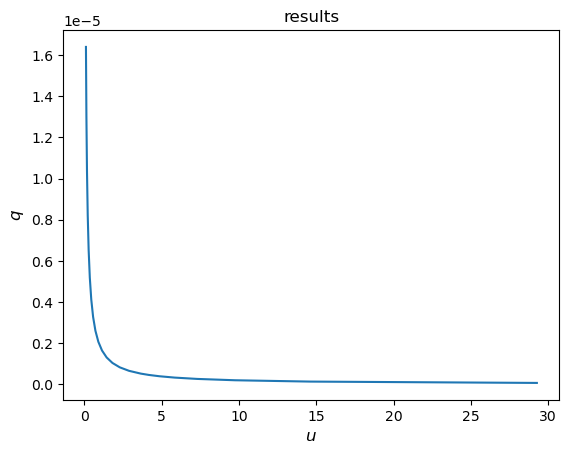

In [88]:
plt.plot(arr_u, arr_I)
plt.title('results', fontsize=12)
plt.ylabel('$q$', fontsize=12)
plt.xlabel('$u$', fontsize=12)
plt.show()

В целом, данная зависимость выглядит аналогично зависимости, получаемой в похожем полуаналитическом подходе при расчете давления в скважине, работающей с постоянным дебитом. Возможно, реализованный алгоритм жизнеспособен.

В вычислениях выше была выбрана достаточно грубая сетка, чтобы ускорить вычислительный процесс. Посмотрим, меняется ли значение интеграла по поверхности при изменении поверхности. Будет выбрано малое $u$, что соответсвует бОльшим временам в исходном пространстве и более стабильному течению:

In [97]:
q_computation(0.018285, x0d, y0d, z0d, hd, rwd, lxd, 1 * lyd, 1 * lzd)

0.00010343559112538577

In [98]:
q_computation(0.018285, x0d, y0d, z0d, hd, rwd, 2 * lxd, 2 * lyd, 2 * lzd)

0.0004121908609534882

In [99]:
q_computation(0.018285, x0d, y0d, z0d, hd, rwd, 2 * lxd, 3 * lyd, 3 * lzd)

0.0009240962449224764

In [101]:
q_computation(0.018285, x0d, y0d, z0d, hd, rwd, 3 * lxd, 3 * lyd, 3 * lzd)

0.00046614281424908874

По порядку величины результаты более-менее сходятся, отличие не более, чем в 10 раз. Это говорит о том, что сетка при вычислении двойного интеграла должна быть выбрана более мелкая, чтобы обеспечить результат получше. Но это приводит к большим временным затратам, поэтому для более качественного решения задачи необходима оптимизация расчетов и, возможно, другие вычислительные подходы.